# Deutsch Problem Implementation

In this notebook, I implemented the **Deutsch Algorithm** using quantum computing techniques. The Deutsch algorithm is a simple quantum algorithm that determines whether a function is constant or balanced with a single evaluation.

### Key Steps:
1. **Oracle Selection**: I implemented a Deutsch oracle that can represent different functions (constant or balanced) based on input qubits and oracles.
2. **Quantum Circuit**: A quantum circuit was constructed using **quantum registers**, **classical registers**, and various quantum gates (such as **X** and **CNOT** gates).
3. **Simulation**: The quantum circuit was simulated on a quantum backend using **AerSimulator** with at least 100 shots to obtain probabilistic measurement results. Additionally, the algorithm was executed on **real quantum hardware** with at least 1000 shots, to compare results from both the simulator and the actual device.
4. **Results**: The results are printed for each oracle and input combination, showing whether the function is constant or balanced.

This approach demonstrates the quantum speedup in solving the Deutsch problem with fewer evaluations compared to classical methods.

### Creating the Uf3 Oracle with |1> state in the first qubit 

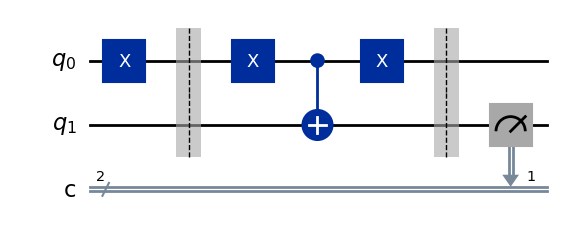

In [32]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

q = QuantumRegister(2, 'q')
c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(q,c)

circuit.x(q[0])
circuit.barrier(q[0], [1])
circuit.x(q[0])
circuit.cx(q[0], q[1])
circuit.x(q[0])
circuit.barrier(q[0], q[1])
circuit.measure(q[1], c[1])
circuit.draw('mpl')

### Creating A Function For A Deutsch's Oracle, enabling change of input in first qubit


In [50]:
def DeutschOracle(input_qubit):
    q = QuantumRegister(2, 'q')
    c = ClassicalRegister(2, 'c')
    DeutschCircuit = QuantumCircuit(q,c)
    
#Set Input
    if input_qubit == 1:
        DeutschCircuit.x(q[0])
        
#Create Oracle
    DeutschCircuit.barrier(q[0], [1])
    DeutschCircuit.x(q[0])
    DeutschCircuit.cx(q[0], q[1])
    DeutschCircuit.x(q[0])
    DeutschCircuit.barrier(q[0], q[1])
    DeutschCircuit.measure(q[1], c[1])

    return DeutschCircuit
output = DeutschOracle(1)
print(output)

     ┌───┐ ░ ┌───┐     ┌───┐ ░    
q_0: ┤ X ├─░─┤ X ├──■──┤ X ├─░────
     └───┘ ░ └───┘┌─┴─┐└───┘ ░ ┌─┐
q_1: ──────░──────┤ X ├──────░─┤M├
           ░      └───┘      ░ └╥┘
c: 2/═══════════════════════════╩═
                                1 


## Implementing Multiple Oracles and Inputs

In [72]:
def DeutschOracle(input_qubit, oracle):
    q = QuantumRegister(2, 'q')
    c = ClassicalRegister(2, 'c')
    DeutschCircuit = QuantumCircuit(q,c)
    
#Set Input
    if input_qubit == 1:
        DeutschCircuit.x(q[0])
        
#Create Oracles
#Uf1
    if oracle == 1:
        DeutschCircuit.barrier(q[0], q[1])
        DeutschCircuit.id(q[0])
        DeutschCircuit.barrier(q[0], q[1])
        DeutschCircuit.measure(q[1], c[1])
        
#Uf2
    elif oracle == 2:
        DeutschCircuit.barrier(q[0], q[1])
        DeutschCircuit.cx(q[0], q[1])
        DeutschCircuit.barrier(q[0], q[1])
        DeutschCircuit.measure(q[1], c[1])
            
#Uf3
    elif oracle == 3:
        DeutschCircuit.barrier(q[0], [1])
        DeutschCircuit.x(q[0])
        DeutschCircuit.cx(q[0], q[1])
        DeutschCircuit.x(q[0])
        DeutschCircuit.barrier(q[0], q[1])
        DeutschCircuit.measure(q[1], c[1])

#Uf4
    elif oracle == 4:
        DeutschCircuit.barrier(q[0], q[1])
        DeutschCircuit.x(q[1])
        DeutschCircuit.barrier(q[0], q[1])
        DeutschCircuit.measure(q[1], c[1])

    return DeutschCircuit
        
output = DeutschOracle(input_qubit=1, oracle=4)
print(output)

     ┌───┐ ░       ░    
q_0: ┤ X ├─░───────░────
     └───┘ ░ ┌───┐ ░ ┌─┐
q_1: ──────░─┤ X ├─░─┤M├
           ░ └───┘ ░ └╥┘
c: 2/═════════════════╩═
                      1 


## A loop that runs through all possible combinations of oracles and inputs
### Steps to Implement and Run Deutsch Algorithm Circuits

1. **Importing Necessary Libraries**:
   - Imported **AerSimulator** from Qiskit for simulating the quantum circuits.
   - Imported **SamplerV2** from **qiskit_ibm_runtime** to run the circuits on a quantum backend.

2. **Setting Up the Backend**:
   - Defined **AerSimulator** as the backend for circuit simulation.
   - Created a **Sampler** to run the transpiled quantum circuits.

3. **Job Creation**:
   - Iterated through all combinations of input qubit states (`0` and `1`) and oracle choices (`f1`, `f2`, `f3`, `f4`).
   - For each combination, the corresponding **Deutsch Oracle** circuit was created using the `DeutschOracle()` function.

4. **Circuit Transpiling**:
   - Transpiled each generated quantum circuit to optimize it for the selected backend (`AerSimulator`).

5. **Running the Job**:
   - Ran each transpiled circuit on the simulator using **100 shots** to gather probabilistic results.
   - Appended each job to a list for later result retrieval.

6. **Result Retrieval**:
   - Defined the `GetResults()` function to extract the counts of measurement outcomes from each job.
   - Iterated through the list of jobs, retrieved the results, and printed the outcome for each combination of input qubit state and oracle choice.

### Summary:
This process automates the testing of all possible input and oracle combinations for the **Deutsch Algorithm**, both on a simulator and real hardware, by executing them in parallel and retrieving the measurement results.


In [79]:
from qiskit_aer import AerSimulator
from qiskit import transpile
from qiskit_ibm_runtime import SamplerV2 as Sampler


backend = AerSimulator()
#sampler = Sampler(mode=backend)

jobs = []

input_values = [0, 1]  
oracle_choices = [1, 2, 3, 4] 

for input_state in input_values:
    for oracle_choice in oracle_choices:
        DeutcshCircuit = DeutschOracle(input_state, oracle_choice)
        
        # Transpile circuit
        transpiled_circuit = transpile(DeutcshCircuit, backend=backend)
        
        job = sampler.run([transpiled_circuit], shots=100)
        
        # Append job to list
        jobs.append(job)

        
# Function to retrieve results from a job
def GetResults(job):
    results = job.result()[0].data
    outputs = {}
    for key in results.__dict__:
        outputs[key] = results.__dict__[key].get_counts()
    return outputs
    
#Retrieve and print results from each job
for job in jobs:
    outputs = GetResults(job)
    print(outputs)


{'c': {'00': 100}}
{'c': {'00': 100}}
{'c': {'10': 100}}
{'c': {'10': 100}}
{'c': {'00': 100}}
{'c': {'10': 100}}
{'c': {'00': 100}}
{'c': {'10': 100}}


## Running On a Quantum Computer

In [85]:
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService(channel="ibm_cloud", instance="crn:v1:bluemix:public:quantum-computing:us-east:a/3fd1683bdb2f4bd7b5a9c16264e9531f:ad7d91c7-83ac-4940-9232-867c319705d5::", token="A739W1bW-U5UuPhvQom6N87S-N5DA3tf2o8YpfAeS_bR")
service.backends()

[<IBMBackend('ibm_fez')>,
 <IBMBackend('ibm_pittsburgh')>,
 <IBMBackend('ibm_torino')>,
 <IBMBackend('ibm_marrakesh')>,
 <IBMBackend('ibm_kingston')>]

In [87]:
backend = service.backend("ibm_kingston")
sampler = Sampler(mode=backend)

jobs = []

input_values = [0, 1]  
oracle_choices = [1, 2, 3, 4] 

for input_state in input_values:
    for oracle_choice in oracle_choices:
        DeutcshCircuit = DeutschOracle(input_state, oracle_choice)
        
        # Transpile circuit
        transpiled_circuit = transpile(DeutcshCircuit, backend=backend)
        
        job = sampler.run([transpiled_circuit], shots=1000)
        
        # Append job to list
        jobs.append(job)

        
# Function to retrieve results from a job
def GetResults(job):
    results = job.result()[0].data
    outputs = {}
    for key in results.__dict__:
        outputs[key] = results.__dict__[key].get_counts()
    return outputs
    
#Retrieve and print results from each job
for job in jobs:
    outputs = GetResults(job)
    print(outputs)


{'c': {'00': 999, '10': 1}}
{'c': {'00': 992, '10': 8}}
{'c': {'10': 989, '00': 11}}
{'c': {'10': 991, '00': 9}}
{'c': {'00': 1000}}
{'c': {'10': 975, '00': 25}}
{'c': {'00': 993, '10': 7}}
{'c': {'10': 997, '00': 3}}
